# Point Cloud Alignment 

## Task 1 Opend 3D visualization

In [4]:
!pip3 install mrob

Defaulting to user installation because normal site-packages is not writeable
  Using cached mrob-0.0.8-py3-none-macosx_10_9_x86_64.whl (1.1 MB)
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [6]:
!pip3 install numpy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 19.8 MB 1.7 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [8]:
!pip3 install open3d

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 74.4 MB 2.9 MB/s eta 0:00:011
     |████████████████████████████████| 3.3 MB 13.4 MB/s eta 0:00:01
  Using cached addict-2.4.0-py3-none-any.whl (3.8 kB)
  Using cached scikit_learn-1.2.1-cp39-cp39-macosx_10_9_x86_64.whl (9.1 MB)
     |████████████████████████████████| 9.9 MB 21.7 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 197 kB 20.2 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 5.8 MB/s  eta 0:00:01
     |████████████████████████████████| 12.0 MB 13.3 MB/s eta 0:00:01
     |████████████████████████████████| 7.4 MB 18.2 MB/s eta 0:00:01
     |████████████████████████████████| 90 kB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 101 kB 16.6 MB/s ta 0:00:01
     |████████████████████████████████| 15.2 MB 20.6 MB/s eta 0:00:01
  Using cached Jinja2-3.1.2-py3-no

In [9]:
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import sys
import mrob
import numpy as np
import open3d
import random 
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from math import sin, cos, atan2, pi
from IPython.display import display, Math, Latex, Markdown, HTML

In [3]:
# generate random data
N = 500
X =  np.random.rand(N,3)
T = mrob.geometry.SE3(np.random.rand(6))
Y = T.transform_array(X)+np.random.normal(loc = 0, scale = 0.05, size = (500,3))

Creat a function Vis(X, color) that plots a points X with the color using Open3d 

In [33]:
def vis (X, color = np.array([0,0,1], dtype='float64')): 
    pcd = open3d.geometry.PointCloud()
    pcd.points = open3d.utility.Vector3dVector(X)
    pcd.paint_uniform_color(color)
    open3d.visualization.draw_plotly([pcd])

In [34]:
vis(X, np.array([0,0,1], dtype='float64'))

In [17]:
print('X = \n', X,'\n T = \n', T.T(),'\n Y =\n', Y)

X = 
 [[8.24960550e-01 4.36882471e-01 2.26935314e-01]
 [8.88800959e-01 4.62475405e-01 9.63816573e-01]
 [9.90778804e-01 7.77245117e-01 8.67758495e-01]
 ...
 [1.96120530e-01 6.34608482e-01 2.30975049e-02]
 [8.25175223e-02 4.45473452e-01 9.81461412e-04]
 [6.23701251e-01 7.38548124e-01 7.49214437e-01]] 
 T = 
 [[ 0.70207326 -0.45785822  0.545398    0.78878796]
 [ 0.71209502  0.45540073 -0.53435088  0.34420741]
 [-0.0037177   0.76352867  0.64576323  0.31455896]
 [ 0.          0.          0.          1.        ]] 
 Y =
 [[1.27606587 0.96931945 0.69439038]
 [1.73908649 0.61787425 1.3001064 ]
 [1.58813009 0.93679356 1.36253565]
 ...
 [0.64310946 0.73280258 0.73545855]
 [0.65074786 0.59866467 0.67689477]
 [1.28714865 0.71631795 1.32969249]]


## Task 2 point cloud Alignment using Arun's Method. 


In [6]:

def pcd_1(X, color, T = np.identity(4)):
    pcd = open3d.geometry.PointCloud()
    pcd.points = open3d.utility.Vector3dVector(X)
    pcd.transform(T)
    pcd.paint_uniform_color(color)
    return pcd

In [19]:
def vis_her(X, Y, T = np.identity(4)):
    blue = np.array([0,0,1], dtype='float64')
    red = np.array([1,0,0], dtype='float64')
    open3d.visualization.draw_plotly([pcd_1(X,red), pcd_1(Y,blue, T)])

In [20]:
def apply_t (X, T):
    pcd = open3d.geometry.PointCloud()
    pcd.points = open3d.utility.Vector3dVector(X)
    pcd.transform(T)
    new_X = np.array(pcd.points)
    return new_X 
    

###  TODO: 
-use the function mrob.registration.arun() on the two point clouds. 

-Plot the two point clouds befor and after the solution. 

In [21]:
# solve the problem
# TODO: 
#* use the function mrob.registration.arun() on the two point clouds. 
#* Plot the two point clouds befor and after the solution. 

vis_her(X, Y)
T_arun = mrob.registration.arun(X, Y)
print('Arun solution =\n', T_arun.T())
vis_her(Y, X, np.asarray(T_arun.T()))

Arun solution =
 [[ 0.77702078 -0.60526241  0.17290495  0.23837799]
 [ 0.62470412  0.77522451 -0.09365741  0.72276812]
 [-0.07735285  0.18078819  0.98047548  0.5104911 ]
 [ 0.          0.          0.          1.        ]]


### TODO: 
- Calculate the Rotation Distance and Translation Distance of arun't method output and ground truth. 

In [37]:
# Claculate the error: 
# err = np.std(X - Y)
# TODO: 
#* Calculate the Rotation Distance and Translation Distance of arun't method output and ground truth. 

print('Rotation Distance: ', T_arun.distance_rotation(mrob.geometry.SE3(T))) 
print('Translation Distance: ', T_arun.distance_trans(mrob.geometry.SE3(T)))

Rotation Distance:  0.0025942272449513784
Translation Distance:  0.0030609144401729208


# ICP:


In [38]:
# Genrate data: 
angle = pi / 8
R_true = np.array([[cos(angle), -sin(angle), 0], 
                   [sin(angle),  cos(angle), 0],
                   [0, 0, 1]])
t_true = np.array([[-2], [5], [0]])
num_points = 30
true_data = np.zeros((3, num_points))
true_data[0, :] = range(0, num_points)
true_data[1, :] = 0.2 * true_data[0, :] * np.sin(0.5 * true_data[0, :]) 
transformed_data = R_true.dot(true_data) + t_true

Q = true_data.T
P = transformed_data.T
vis_her(Q, P)


## Task 1: 

### Calculate correspondence

In [145]:
def get_correspondence_indices(P, Q):
    """TODO 
    #*For each point in P find closest one in Q."""
    correspondences = np.zeros([2, len(P)])
    correspondences[0, :] = np.arange(len(P))
    for i in range(len(P)):
            correspondences[1, i] = np.argmin((np.asarray(P[i, 0]) - np.asarray(Q[:, 0])) ** 2 + 
                                              (np.asarray(P[i, 1]) - np.asarray(Q[:, 1])) ** 2 + 
                                              (np.asarray(P[i, 2]) - np.asarray(Q[:, 2])) ** 2)

    return correspondences.T

In [146]:
result = get_correspondence_indices(P, Q)
print(result)

[[ 0.  0.]
 [ 1.  0.]
 [ 2.  0.]
 [ 3.  2.]
 [ 4.  3.]
 [ 5.  3.]
 [ 6.  4.]
 [ 7.  4.]
 [ 8.  5.]
 [ 9.  5.]
 [10.  5.]
 [11. 14.]
 [12. 15.]
 [13. 15.]
 [14. 15.]
 [15. 15.]
 [16. 15.]
 [17. 16.]
 [18. 16.]
 [19. 16.]
 [20. 16.]
 [21. 16.]
 [22. 17.]
 [23. 17.]
 [24. 28.]
 [25. 28.]
 [26. 28.]
 [27. 28.]
 [28. 28.]
 [29. 28.]]


In [150]:
correspondences = list(map(tuple, result.astype('int')))
correspondences

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 2),
 (4, 3),
 (5, 3),
 (6, 4),
 (7, 4),
 (8, 5),
 (9, 5),
 (10, 5),
 (11, 14),
 (12, 15),
 (13, 15),
 (14, 15),
 (15, 15),
 (16, 15),
 (17, 16),
 (18, 16),
 (19, 16),
 (20, 16),
 (21, 16),
 (22, 17),
 (23, 17),
 (24, 28),
 (25, 28),
 (26, 28),
 (27, 28),
 (28, 28),
 (29, 28)]

In [151]:
def draw_correspondeces(P, Q, correspondences, ax):
    label_added = False
    for i, j in correspondences:
        x = [P[i, 0], Q[j, 0]]
        y = [P[i, 1], Q[j, 1]]
        z = [P[i, 2], Q[j, 2]]
        if not label_added:
            ax.plot(x, y,z, color='grey', label='correpondences')
            label_added = True
        else:
            ax.plot(x, y, z,color='grey')
    ax.legend()

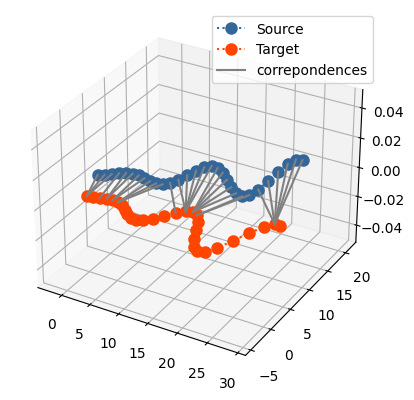

In [156]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(P[:,0], P[:,1], P[:,2],color='#336699', markersize=8, marker='o', linestyle=":", label = 'Source')
ax.plot(Q[:,0], Q[:,1], Q[:,2],color='orangered', markersize=8, marker='o', linestyle=":", label = 'Target')
draw_correspondeces(P, Q, correspondences, ax)
plt.show()


### Use the Arun's method to calculat first correction of ICP: 

In [158]:
X = Q
Y = np.zeros_like(X)
for i, j in correspondences: 
    Y[i] = Q[j]
    
T_arun = mrob.registration.arun(Y, X)
print(T_arun.T())
vis_her(Q,P, np.asarray(T_arun.T()))

[[ 0.99424538  0.10712671  0.          0.90844785]
 [-0.10712671  0.99424538  0.         -0.80778366]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]


## Let's Make it iterative: 

In [161]:
P = apply_t(P, T_arun.T())
correspondences = list(map(tuple, get_correspondence_indices(P, Q).astype('int')))
X = Q
Y = np.zeros_like(X)
for i, j in correspondences: 
    Y[i] = Q[j]
    
T_arun = mrob.registration.arun(Y, X)
print(T_arun.T())
vis_her(Q,P, np.asarray(T_arun.T()))


[[ 0.99437369  0.10592902  0.         -1.90483931]
 [-0.10592902  0.99437369  0.          0.13180864]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]
